In [138]:
import os
import datetime
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

if os.getcwd().endswith('notebook'):
    os.chdir('..')

In [2]:
sns.set(palette='colorblind', font_scale=1.3)

In [199]:
species_df = pd.read_csv(os.path.join(os.getcwd(), 'data/condensed_traits/condensed_species_NCBI.csv'))

In [200]:
len(species_df)

14884

In [5]:
species_df.columns

Index(['species_tax_id', 'species', 'genus', 'family', 'order', 'class',
       'phylum', 'superkingdom', 'gram_stain', 'metabolism', 'pathways',
       'carbon_substrates', 'sporulation', 'motility', 'range_tmp',
       'range_salinity', 'cell_shape', 'isolation_source', 'd1_lo', 'd1_up',
       'd2_lo', 'd2_up', 'doubling_h', 'genome_size', 'gc_content',
       'coding_genes', 'optimum_tmp', 'optimum_ph', 'growth_tmp',
       'rRNA16S_genes', 'tRNA_genes', 'gram_stain.count', 'metabolism.count',
       'pathways.count', 'carbon_substrates.count', 'sporulation.count',
       'motility.count', 'range_tmp.count', 'range_salinity.count',
       'cell_shape.count', 'isolation_source.count', 'gram_stain.prop',
       'metabolism.prop', 'pathways.prop', 'carbon_substrates.prop',
       'sporulation.prop', 'motility.prop', 'range_tmp.prop',
       'range_salinity.prop', 'cell_shape.prop', 'isolation_source.prop',
       'd1_lo.count', 'd1_up.count', 'd2_lo.count', 'd2_up.count',
       'doub

In [6]:
species_df.head()

,species_tax_id,species,genus,family,order,class,phylum,superkingdom,gram_stain,metabolism,...,genome_size.stdev,gc_content.stdev,coding_genes.stdev,optimum_tmp.stdev,optimum_ph.stdev,growth_tmp.stdev,rRNA16S_genes.stdev,tRNA_genes.stdev,data_source,ref_id
0,1243001,Acidipropionibacterium damnosum,Acidipropionibacterium,Propionibacteriaceae,Propionibacteriales,Actinobacteria,Actinobacteria,Bacteria,NaN,microaerophilic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bacdive-microa,151
1,1679466,Apibacter adventoris,Apibacter,Flavobacteriaceae,Flavobacteriales,Flavobacteriia,Bacteroidetes,Bacteria,NaN,microaerophilic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bacdive-microa,151
2,1591092,Aquaspirillum soli,Aquaspirillum,Chromobacteriaceae,Neisseriales,Betaproteobacteria,Proteobacteria,Bacteria,NaN,microaerophilic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bacdive-microa,151
3,1904463,Arcobacter lekithochrous,Arcobacter,Campylobacteraceae,Campylobacterales,Epsilonproteobacteria,Proteobacteria,Bacteria,NaN,microaerophilic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bacdive-microa,151
4,1935204,Arcobacter porcinus,Arcobacter,Campylobacteraceae,Campylobacterales,Epsilonproteobacteria,Proteobacteria,Bacteria,NaN,microaerophilic,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bacdive-microa,151


In [7]:
len(species_df[species_df['range_tmp'].notnull()])

2753

In [29]:
len(species_df[species_df['growth_tmp'].notnull()])

11265

In [8]:
len(species_df['phylum'].unique())

73

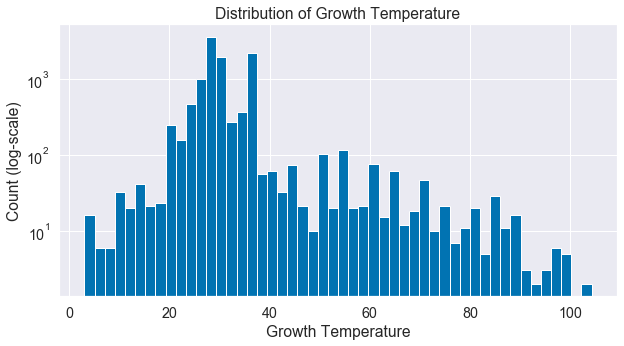

In [38]:
ax = species_df['growth_tmp'].hist(figsize=(10, 5), bins=50, log=True);
ax.set_title('Distribution of Growth Temperature')
ax.set_xlabel('Growth Temperature');
ax.set_ylabel('Count (log-scale)');

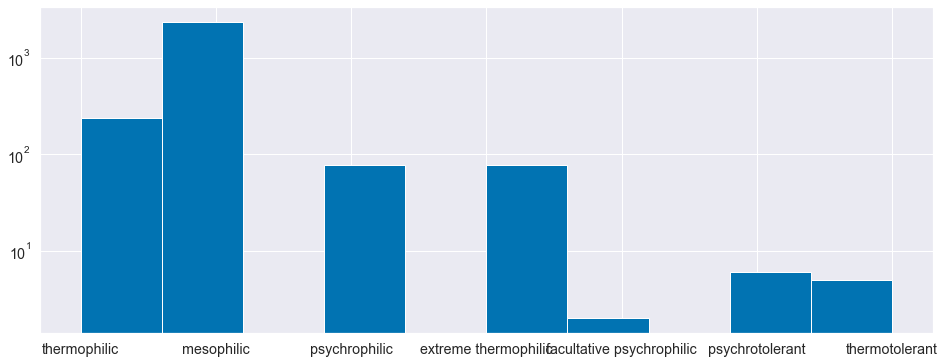

In [10]:
ax = species_df['range_tmp'].hist(figsize=(16, 6), log=True)

Species selection:

- Mesophilic, thermophilic, extreme thermophilic, psychrophilic
- At least 5 species from the same Phylum

In [11]:
phylum_count = species_df[species_df['range_tmp'].isin([
    'thermophilic', 'mesophilic', 'psychrophilic', 'extreme thermophilic',
])][
    ['phylum', 'species_tax_id']
].groupby(
    ['phylum']
).count().sort_values('species_tax_id', ascending=False)

In [12]:
100 * len(phylum_count[phylum_count['species_tax_id'] > 10]) / len(phylum_count)

35.18518518518518

In [13]:
relevant_phylums = phylum_count[phylum_count['species_tax_id'] > 5].index

In [14]:
n_phylum = lambda v: 100 * len(phylum_count[phylum_count['species_tax_id'] >= v]) / len(phylum_count)
n_total = lambda v: len(phylum_count[phylum_count['species_tax_id'] >= v]) * v

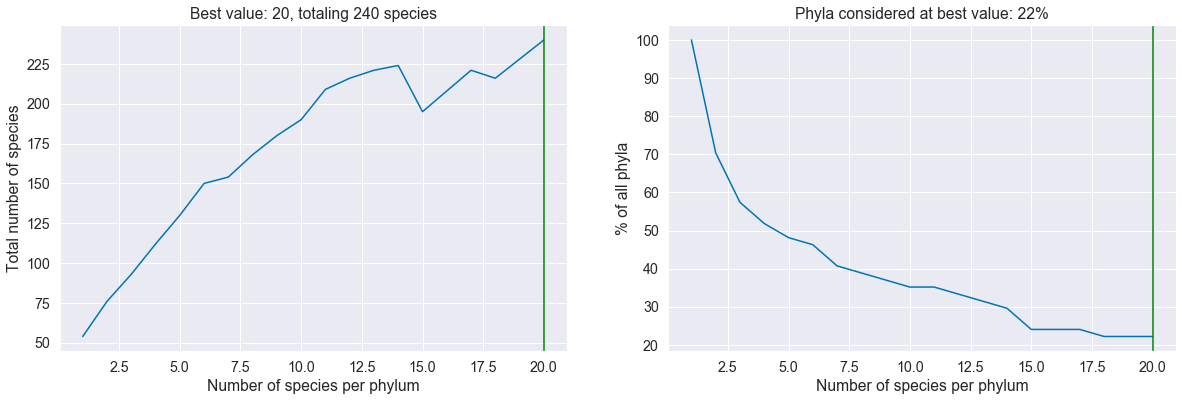

In [15]:
x = list(range(1, 21))
y = [n_total(v) for v in x]

f, axes = plt.subplots(1, 2, figsize=(20, 6))
ax, ax2 = axes

ax.plot(x, y);

best_idx = np.argmax(y)
best_value = x[best_idx]
ax.axvline(best_value, color='green');
ax.set_title(f'Best value: {best_value}, totaling {y[best_idx]:,} species');
ax.set_xlabel('Number of species per phylum');
ax.set_ylabel('Total number of species');

y2 = [n_phylum(v) for v in x]
ax2.plot(x, y2);
ax2.axvline(best_value, color='green');
ax2.set_title(f'Phyla considered at best value: {y2[best_idx]:.0f}%');
ax2.set_xlabel('Number of species per phylum');
ax2.set_ylabel('% of all phyla');

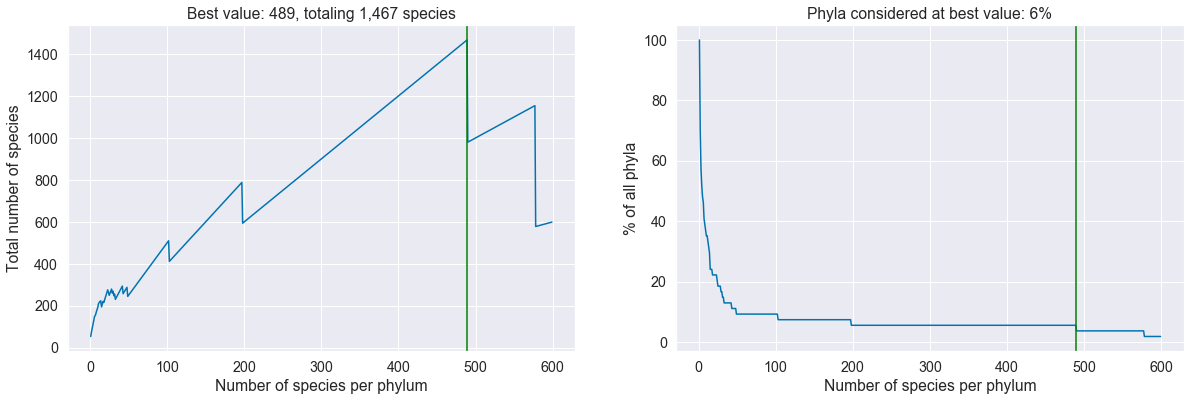

In [16]:
x = list(range(1, 600))
y = [n_total(v) for v in x]

f, axes = plt.subplots(1, 2, figsize=(20, 6))
ax, ax2 = axes

ax.plot(x, y);

best_idx = np.argmax(y)
best_value = x[best_idx]
ax.axvline(best_value, color='green');
ax.set_title(f'Best value: {best_value}, totaling {y[best_idx]:,} species');
ax.set_xlabel('Number of species per phylum');
ax.set_ylabel('Total number of species');

y2 = [n_phylum(v) for v in x]
ax2.plot(x, y2);
ax2.axvline(best_value, color='green');
ax2.set_title(f'Phyla considered at best value: {y2[best_idx]:.0f}%');
ax2.set_xlabel('Number of species per phylum');
ax2.set_ylabel('% of all phyla');

In [17]:
0.35 * len(phylum_count)

18.9

In [18]:
selected_phyla = phylum_count[phylum_count['species_tax_id'] >= 11].index

In [19]:
selected_phyla

Index(['Proteobacteria', 'Firmicutes', 'Actinobacteria', 'Bacteroidetes',
       'Euryarchaeota', 'Tenericutes', 'Spirochaetes', 'Crenarchaeota',
       'Cyanobacteria', 'Chloroflexi', 'Planctomycetes', 'Deinococcus-Thermus',
       'Thermotogae', 'Fusobacteria', 'Verrucomicrobia',
       'Candidatus Parcubacteria', 'Thaumarchaeota', 'Chlamydiae', 'Chlorobi'],
      dtype='object', name='phylum')

In [20]:
species_df[
    (species_df['phylum'].isin(selected_phyla)) &
    (species_df['range_tmp'].isin([
        'thermophilic', 'mesophilic', 'psychrophilic', 'extreme thermophilic',
    ]))
][['range_tmp', 'species_tax_id']].groupby(['range_tmp']).count()

,species_tax_id
range_tmp,
extreme thermophilic,70
mesophilic,2276
psychrophilic,73
thermophilic,212


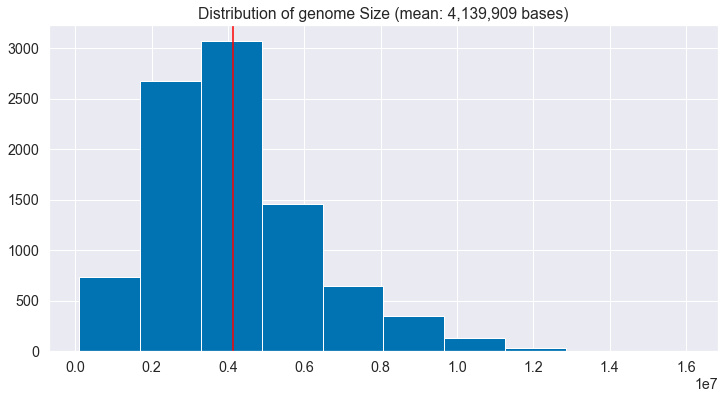

In [21]:
avg = species_df['genome_size'].mean()
ax = species_df['genome_size'].hist(figsize=(12, 6));
ax.axvline(avg, color='red');
ax.set_title(f'Distribution of genome Size (mean: {avg:,.0f} bases)');

In [22]:
seed = 10
n_species_per_phylum = 11
rs = np.random.RandomState(seed)
selected_species = []
for phylum in selected_phyla:
    df = species_df[
        (species_df['phylum'] == phylum) &
        (species_df['range_tmp'].isin([
            'thermophilic', 'mesophilic', 'psychrophilic', 'extreme thermophilic',
        ]))
    ]
    ix = df.index.tolist()
    selected_indices = rs.choice(ix, size=n_species_per_phylum, replace=False)
    selected_species += species_df.loc[selected_indices]['species_tax_id'].values.tolist()
    
print(len(selected_species))

209


In [23]:
species_df[
    species_df['species_tax_id'].isin(selected_species)
][['range_tmp', 'species_tax_id']].groupby(['range_tmp']).count()

,species_tax_id
range_tmp,
extreme thermophilic,16
mesophilic,160
psychrophilic,4
thermophilic,29


## Stratification?

In [27]:
count_per_phylum = species_df[species_df['range_tmp'].notnull()][['phylum', 'species_tax_id']].groupby(['phylum']).count().sort_values(
    'species_tax_id', ascending=False,
)
len(count_per_phylum)

54

In [28]:
count_per_phylum

,species_tax_id
phylum,
Proteobacteria,947
Firmicutes,585
Actinobacteria,489
Bacteroidetes,199
Euryarchaeota,102
Tenericutes,48
Spirochaetes,42
Crenarchaeota,32
Cyanobacteria,30


## Load list of NCBI species

In [128]:
ncbi_full_list_path = os.path.join(os.getcwd(), 'data/condensed_traits/ncbi_available_sequences.txt')
ncbi_genomes_list = pd.read_csv(ncbi_full_list_path, sep='\t', skiprows=1)
ncbi_genomes_list.head()

/Users/srom/workspace/rna_learn/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,assembly_accession,bioproject,biosample,wgs_master,refseq_category,taxid,species_taxid,organism_name,infraspecific_name,isolate,...,release_type,genome_rep,seq_rel_date,asm_name,submitter,gbrs_paired_asm,paired_asm_comp,ftp_path,excluded_from_refseq,relation_to_type_material
0,GCA_000001215.4,PRJNA13812,SAMN02803731,NaN,reference genome,7227,7227,Drosophila melanogaster,NaN,NaN,...,Major,Full,01/08/2014,Release 6 plus ISO1 MT,The FlyBase Consortium/Berkeley Drosophila Gen...,GCF_000001215.4,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,NaN,NaN
1,GCA_000001405.28,PRJNA31257,NaN,NaN,reference genome,9606,9606,Homo sapiens,NaN,NaN,...,Patch,Full,28/02/2019,GRCh38.p13,Genome Reference Consortium,GCF_000001405.39,different,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,NaN,NaN
2,GCA_000001515.5,PRJNA13184,SAMN02981217,AACZ00000000.4,na,9598,9598,Pan troglodytes,NaN,Yerkes chimp pedigree #C0471 (Clint),...,Major,Full,03/05/2016,Pan_tro 3.0,Chimpanzee Sequencing and Analysis Consortium,GCF_000001515.7,different,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,NaN,NaN
3,GCA_000001545.3,PRJNA20869,SAMN02981238,ABGA00000000.1,na,9601,9601,Pongo abelii,NaN,ISIS 71,...,Major,Full,13/11/2008,P_pygmaeus_2.0.2,Orangutan Genome Sequencing Consortium,na,na,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,NaN,NaN
4,GCA_000001635.8,PRJNA20689,NaN,NaN,reference genome,10090,10090,Mus musculus,NaN,NaN,...,Patch,Full,15/09/2017,GRCm38.p6,Genome Reference Consortium,GCF_000001635.26,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,NaN,NaN


In [95]:
species_taxids = ncbi_genomes_list[
    (ncbi_genomes_list['assembly_level'] == 'Complete Genome') &
    (ncbi_genomes_list['genome_rep'] == 'Full') &
    (ncbi_genomes_list['excluded_from_refseq'].isnull())
]['species_taxid'].unique()
len(species_taxids)

20521

In [96]:
species_in_dataset = species_df[species_df['growth_tmp'].notnull()]['species_tax_id'].unique()
len(species_in_dataset)

11265

In [97]:
candidate_species_taxids = sorted(set(species_taxids) & set(species_in_dataset))
len(candidate_species_taxids)

2478

In [98]:
candidate_species = species_df[species_df['species_tax_id'].isin(candidate_species_taxids)].reset_index(drop=True)

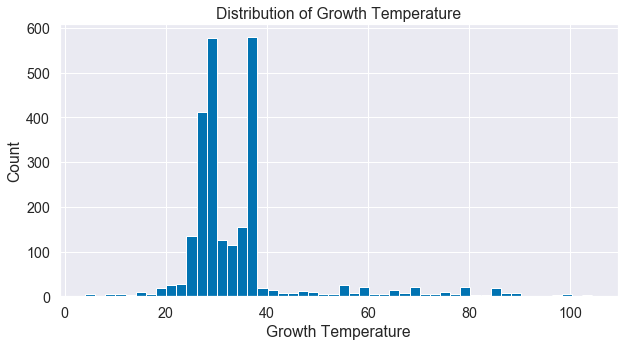

In [168]:
ax = candidate_species['growth_tmp'].hist(figsize=(10, 5), bins=50, log=False);
ax.set_title('Distribution of Growth Temperature')
ax.set_xlabel('Growth Temperature');
ax.set_ylabel('Count');

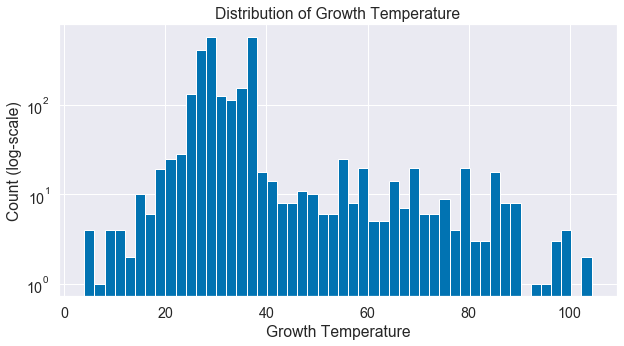

In [100]:
ax = candidate_species['growth_tmp'].hist(figsize=(10, 5), bins=50, log=True);
ax.set_title('Distribution of Growth Temperature')
ax.set_xlabel('Growth Temperature');
ax.set_ylabel('Count (log-scale)');

In [101]:
ncbi_candidate_records = ncbi_genomes_list[
    (ncbi_genomes_list['assembly_level'] == 'Complete Genome') &
    (ncbi_genomes_list['genome_rep'] == 'Full') &
    (ncbi_genomes_list['species_taxid'].isin(candidate_species_taxids))
].reset_index(drop=True)

len(ncbi_candidate_records)

14494

In [102]:
ncbi_candidate_records['seq_rel_date_processed'] = ncbi_candidate_records['seq_rel_date'].apply(
    lambda d_str: datetime.datetime.strptime(d_str, '%d/%m/%Y')
)

In [123]:
def select_representative_genome(ncbi_candidate_records):
    species_taxid = ncbi_candidate_records['species_taxid'].unique()
    
    stats = {
        'reference genome': 0,
        'representative genome': 0,
        'most recent': 0,
        'most recent paired with GenBank': 0,
        'most recent not paired with GenBank': 0,
    }
    stain_indices = []
    for specie_taxid in species_taxid:
        df = ncbi_candidate_records[ncbi_candidate_records['species_taxid'] == specie_taxid]
        ix = df.index
        for row_ix in ix:
            row = ncbi_candidate_records.loc[row_ix]
            refseq_category = row['refseq_category']
            stain_idx = None
            if refseq_category == 'reference genome':
                stats['reference genome'] += 1
                stain_idx = row_ix
                break
            elif refseq_category == 'representative genome':
                stats['representative genome'] += 1
                stain_idx = row_ix
                break
                
        if stain_idx is None:
            stats['most recent'] += 1
            sorted_df = df.sort_values('seq_rel_date_processed', ascending=False)
            
            for row_ix in sorted_df.index:
                row = ncbi_candidate_records.loc[row_ix]
                gbrs_paired_asm = row['gbrs_paired_asm']
                paired_asm_comp = row['paired_asm_comp']
                if (
                    not pd.isnull(gbrs_paired_asm) and 
                    not pd.isnull(paired_asm_comp) and 
                    paired_asm_comp == 'identical'
                ):
                    stain_idx = row_ix
                    stats['most recent paired with GenBank'] += 1
                    break
                    
            if stain_idx is None:
                stain_idx = sorted_df.index[0]
                stats['most recent not paired with GenBank'] += 1
            
        stain_indices.append(stain_idx)
        
    return ncbi_candidate_records.loc[stain_indices].reset_index(drop=True), stats

In [124]:
ncbi_candidate_records_filtered, stats = select_representative_genome(ncbi_candidate_records)

In [125]:
len(ncbi_candidate_records_filtered)

2478

In [126]:
stats

{'reference genome': 103,
 'representative genome': 1336,
 'most recent': 1039,
 'most recent paired with GenBank': 1019,
 'most recent not paired with GenBank': 20}

In [127]:
ncbi_candidate_records_filtered.head()

,assembly_accession,bioproject,biosample,wgs_master,refseq_category,taxid,species_taxid,organism_name,infraspecific_name,isolate,...,genome_rep,seq_rel_date,asm_name,submitter,gbrs_paired_asm,paired_asm_comp,ftp_path,excluded_from_refseq,relation_to_type_material,seq_rel_date_processed
0,GCA_000005825.2,PRJNA28811,SAMN02603086,NaN,representative genome,398511,79885,Bacillus pseudofirmus OF4,strain=OF4,NaN,...,Full,15/12/2010,ASM582v2,"Center for Genomic Sciences, Allegheny-Singer ...",GCF_000005825.2,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,NaN,NaN,2010-12-15
1,GCA_000005845.2,PRJNA225,SAMN02604091,NaN,reference genome,511145,562,Escherichia coli str. K-12 substr. MG1655,strain=K-12 substr. MG1655,NaN,...,Full,26/09/2013,ASM584v2,Univ. Wisconsin,GCF_000005845.2,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,NaN,NaN,2013-09-26
2,GCA_000006175.2,PRJNA20131,SAMN00000040,NaN,representative genome,456320,2188,Methanococcus voltae A3,strain=A3,NaN,...,Full,03/06/2010,ASM617v2,US DOE Joint Genome Institute (JGI-PGF),GCF_000006175.1,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,NaN,NaN,2010-06-03
3,GCA_000006605.1,PRJNA13967,SAMEA3283089,NaN,representative genome,306537,38289,Corynebacterium jeikeium K411,NaN,NaN,...,Full,27/06/2005,ASM660v1,Bielefeld Univ,GCF_000006605.1,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,NaN,NaN,2005-06-27
4,GCA_000019345.1,PRJNA19087,SAMN02604063,NaN,representative genome,505682,134821,Ureaplasma parvum serovar 3 str. ATCC 27815,strain=ATCC 27815,NaN,...,Full,26/02/2008,ASM1934v1,TIGR,GCF_000019345.1,identical,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,NaN,assembly from type material,2008-02-26


In [150]:
def make_download_url(row):
    ftp_path = row['ftp_path'].strip().replace('(', '_').replace(')', '_')
    assembly_accession = row['assembly_accession'].strip().replace('(', '_').replace(')', '_')
    asm_name = row['asm_name'].strip().replace('/', '_').replace('#', '_').replace('(', '_').replace(')', '_')
    download_url_base = f"{ftp_path}/{assembly_accession}_{asm_name}".replace(' ', '_')
    return download_url_base


ncbi_candidate_records_filtered['download_url_base'] = ncbi_candidate_records_filtered.apply(
    make_download_url, 
    axis=1,
)
ncbi_candidate_records_filtered['download_url_base'].iloc[0]

'ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/005/825/GCA_000005825.2_ASM582v2/GCA_000005825.2_ASM582v2'

In [151]:
#ncbi_candidate_records_filtered.to_csv(
#    os.path.join(os.getcwd(), 'data/condensed_traits/ncbi_species_to_fetch.csv'), 
#    index=False,
#)

## Check data quality of downloaded sequences

In [137]:
data_folder = os.path.join(os.getcwd(), 'data/condensed_traits/sequences')

In [175]:
def check_for_missing_files(ncbi_records, data_folder):
    stats_missing = {
        'dna (fna)': 0,
        'annotations (gff)': 0,
        'protein (faa)': 0,
        'CDS (fna)': 0,
        'RNA (fna)': 0,
    }
    
    details = []
    for row_ix in ncbi_records.index:
        row = ncbi_records.loc[row_ix]
        specie_taxid = row['species_taxid']
        files = [
            ('dna (fna)', os.path.join(data_folder, f'{specie_taxid}', f'{specie_taxid}_genomic.fna.gz')),
            ('annotations (gff)', os.path.join(data_folder, f'{specie_taxid}', f'{specie_taxid}_genomic.gff.gz')),
            ('protein (faa)', os.path.join(data_folder, f'{specie_taxid}', f'{specie_taxid}_protein.faa.gz')),
            ('CDS (fna)', os.path.join(data_folder, f'{specie_taxid}', f'{specie_taxid}_cds_from_genomic.fna.gz')),
            ('RNA (fna)', os.path.join(data_folder, f'{specie_taxid}', f'{specie_taxid}_rna_from_genomic.fna.gz')),
        ]
        for category, filepath in files:
            is_missing = False
            if not Path(filepath).is_file():
                stats_missing[category] += 1
                is_missing = True
                
            details.append([specie_taxid, category, is_missing])
    
    details_df = pd.DataFrame(details, columns=['species_taxid', 'content', 'is_missing'])
     
    return stats_missing, details_df

In [153]:
stats_missing, details_df = check_for_missing_files(ncbi_candidate_records_filtered, data_folder)

In [154]:
stats_missing

{'dna (fna)': 0, 'annotations (gff)': 104, 'protein (faa)': 109}

In [156]:
species_to_discard = details_df[details_df['is_missing']]['species_taxid'].unique()
len(species_to_discard)

109

In [158]:
species_with_all_sequences = ncbi_candidate_records_filtered[
    ~ncbi_candidate_records_filtered['species_taxid'].isin(species_to_discard)
].reset_index(drop=True)
len(species_with_all_sequences)

2369

In [159]:
#species_with_all_sequences.to_csv(
#    os.path.join(os.getcwd(), 'data/condensed_traits/ncbi_species_final.csv'), 
#    index=False,
#)

In [163]:
species_taxid = species_with_all_sequences['species_taxid'].values.tolist()

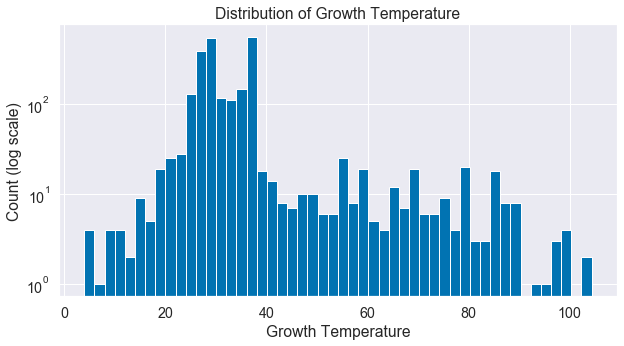

In [172]:
df_ = species_df[species_df['species_tax_id'].isin(species_taxid)]
ax = df_['growth_tmp'].hist(figsize=(10, 5), bins=50, log=True);
ax.set_title('Distribution of Growth Temperature')
ax.set_xlabel('Growth Temperature');
ax.set_ylabel('Count (log scale)');

In [173]:
species_with_all_sequences.iloc[0]['download_url_base']

'ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000/005/825/GCA_000005825.2_ASM582v2/GCA_000005825.2_ASM582v2'

In [176]:
stats_missing_2, details_df_2 = check_for_missing_files(species_with_all_sequences, data_folder)
stats_missing_2

{'dna (fna)': 0,
 'annotations (gff)': 0,
 'protein (faa)': 0,
 'CDS (fna)': 0,
 'RNA (fna)': 10}

In [178]:
species_to_discard_2 = details_df_2[details_df_2['is_missing']]['species_taxid'].unique()
species_with_cds_and_rna = species_with_all_sequences[
    ~species_with_all_sequences['species_taxid'].isin(species_to_discard_2)
].reset_index(drop=True)
len(species_with_cds_and_rna)

2359

In [179]:
#species_with_cds_and_rna.to_csv(
#    os.path.join(os.getcwd(), 'data/condensed_traits/ncbi_species_final.csv'), 
#    index=False,
#)

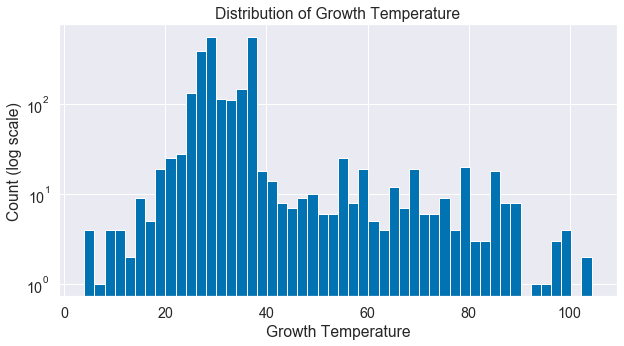

In [193]:
species_taxid = species_with_cds_and_rna['species_taxid'].values.tolist()
df_ = species_df[species_df['species_tax_id'].isin(species_taxid)]
ax = df_['growth_tmp'].hist(figsize=(10, 5), bins=50, log=True);
ax.set_title('Distribution of Growth Temperature')
ax.set_xlabel('Growth Temperature');
ax.set_ylabel('Count (log scale)');

In [196]:
len(df_[['phylum', 'species_tax_id']].groupby(['phylum']).count().sort_values(
    'species_tax_id', ascending=False,
))

33

In [189]:
df_[['superkingdom', 'species_tax_id']].groupby(['superkingdom']).count().sort_values(
    'species_tax_id', ascending=False,
)

,species_tax_id
superkingdom,
Bacteria,2202
Archaea,157


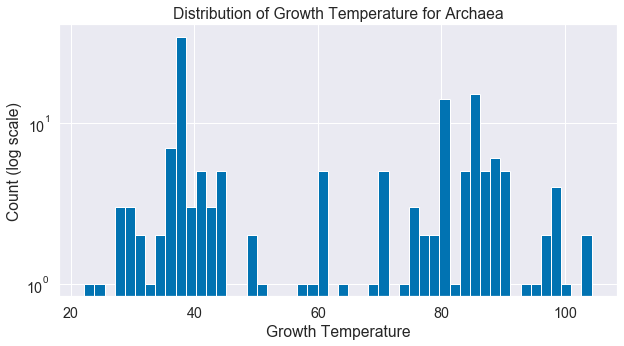

In [198]:
species_taxid = species_with_cds_and_rna['species_taxid'].values.tolist()
df__ = species_df[
    (species_df['species_tax_id'].isin(species_taxid)) &
    (species_df['superkingdom'] == 'Archaea')
]
ax = df__['growth_tmp'].hist(figsize=(10, 5), bins=50, log=True);
ax.set_title('Distribution of Growth Temperature for Archaea')
ax.set_xlabel('Growth Temperature');
ax.set_ylabel('Count (log scale)');